<a href="https://colab.research.google.com/github/BRCInc-dev/Data-Analysis-Tools/blob/main/Training_sklearn_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

# `Su Virsutiniu neveikia  matplot`

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Reasoning:

fetch_openml from sklearn.datasets is used to download the MNIST dataset.
mnist_784 specifies the dataset name.
version=1 ensures we're using the desired version.
cache=True stores the dataset locally for faster subsequent access.

```
# This is formatted as code
```



In [ ]:
X, y = mnist["data"], mnist["target"]
print(X.shape)  # Output: (70000, 784)
print(y.shape)  # Output: (70000,)


(70000, 784)
(70000,)


# Reasoning:

The dataset is loaded into X (features) and y (labels).
X.shape and y.shape show the dimensions of the data.
There are 70,000 images, each represented by 784 features (28x28 pixels).

```
# This is formatted as code
```



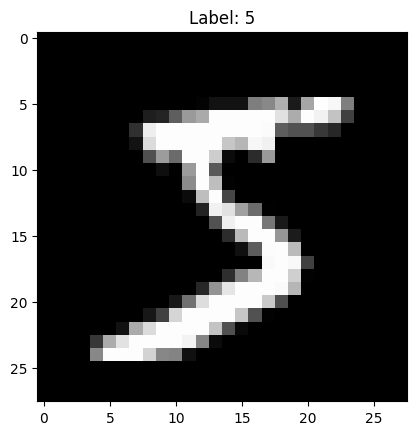

In [ ]:
import matplotlib.pyplot as plt

sample_index = 0  # Choose an index
sample_image = mnist.data[sample_index].reshape(28, 28)
sample_label = mnist.target[sample_index]

plt.imshow(sample_image, cmap='gray')
plt.title(f"Label: {sample_label}")
plt.show()

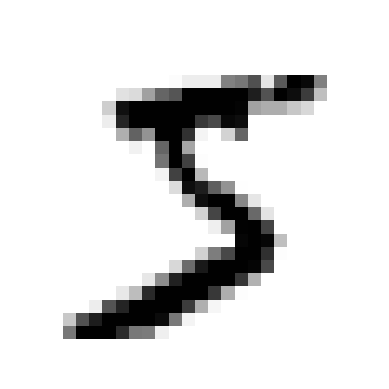

In [ ]:
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

Reasoning:

matplotlib.pyplot is used for visualization.
some_digit is reshaped to a 28x28 image.
plt.imshow displays the image.

```
## This is formatted as code
```





In [ ]:
import numpy as np

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == '5')  # True for all 5s, False for other digits
y_test_5 = (y_test == '5')
print(y_train_5.shape)  # Output: (60000,)
print(y_test_5.shape)  # Output: (10000,)

(60000,)
(10000,)


Reasoning:

The dataset is split into training and test sets.
Target variables are created for binary classification (5 vs. not-5).

```
# This is formatted as code
```



In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Reasoning:

SGDClassifier is imported from sklearn.linear_model.
A classifier instance is created with a random state for reproducibility.
The classifier is trained on the training data.

```
## This is formatted as code
```



In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Reasoning:

cross_val_score is used for cross-validation.
The classifier's performance is evaluated using 3 folds.
Accuracy is used as the scoring metric.

```
## This is formatted as code
```



In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

Reasoning:

A custom dummy classifier is created that always predicts "not-5".
Its performance is evaluated using cross-validation.

```
## This is formatted as code
```



# 3.3. Interpretation

Compare the accuracy scores of the SGD classifier and the dummy classifier. The SGD classifier should achieve significantly higher accuracy than the dummy classifier. If it doesn't, you might need to adjust the model or investigate potential issues with the data.

I hope this helps you with your MNIST classification task! Let me know if you have any other questions.

```
# This is formatted as code
```



# 4. Confusion Matrix and Error Analysis

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Reasoning:

cross_val_predict is used to get predictions on the training set using cross-validation.
This ensures we have predictions for each instance in the training set.

```
# This is formatted as code
```



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)

[[53892   687]
 [ 1891  3530]]


Reasoning:

confusion_matrix is used to create the confusion matrix.
The matrix shows the counts of true negatives, false positives, false negatives, and true positives.

```
# This is formatted as code
```



4.3. Error Analysis

False Positives: These are cases where the classifier predicted '5' but the actual label was not '5'. Analyze these instances to understand what features might be leading to incorrect predictions.
False Negatives: These are cases where the classifier predicted not '5' but the actual label was '5'. Analyze these instances to identify patterns that the classifier might be missing.

```
## This is formatted as code
```



In [ ]:
sgd_clf.fit(X_train, y_train)  # Train on all classes
y_pred = sgd_clf.predict(X_test)  # Predict on test set

Reasoning:

The SGDClassifier is trained on the full dataset with all classes.
Scikit-Learn automatically handles the multiclass classification strategy (likely OvR in this case).

```
# This is formatted as code
```



In [ ]:
from sklearn.svm import SVC

# Limit the dataset to 1000 instances
X_train_limited = X_train[:1000]
y_train_limited = y_train[:1000]

svm_clf = SVC()  # Create an SVM classifier instance
svm_clf.fit(X_train_limited, y_train_limited)  # Train the classifier

SVC()

Reasoning:

We import SVC from sklearn.svm.
We limit the training data to 1000 instances for faster processing.
An SVM classifier instance is created and trained on the limited data.

```
# This is formatted as code
```



In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])  # some_digit from previous steps
selected_digit = 5  # Choose your desired digit
selected_digit_score = some_digit_scores[0][selected_digit]  # Access the score for the selected digit
print(selected_digit_score)

9.301199958507702


Reasoning:

decision_function() provides the decision scores for each class.
We access the score for the selected digit (e.g., '5') from the scores array.

```
## This is formatted as code
```



In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())  # Create an OvR classifier with SVM
ovr_clf.fit(X_train_limited, y_train_limited)  # Train the classifier

OneVsRestClassifier(estimator=SVC())

Reasoning:

We import OneVsRestClassifier from sklearn.multiclass.
An OvR classifier is created using SVC as the base estimator.
The classifier is trained on the limited data.

```
# This is formatted as code
```



In [ ]:
sgd_clf = SGDClassifier(random_state=42)  # Create an SGD classifier
sgd_clf.fit(X_train, y_train)  # Train on all classes for multiclass classification

SGDClassifier(random_state=42)

Reasoning:

We create an SGDClassifier instance.
We train it on the full training data (X_train, y_train) to enable multiclass classification.

```
## This is formatted as code
```



In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Reasoning:

We use cross_val_score to evaluate the accuracy of the multiclass SGDClassifier.
We specify 3-fold cross-validation and use accuracy as the scoring metric.

```
# This is formatted as code
```

